# Guide to Network Analysis (Part 1 - Network Dataset and Network Analysis)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#What-is-a-network?" data-toc-modified-id="What-is-a-network?-2">What is a network?</a></span><ul class="toc-item"><li><span><a href="#Network-Dataset" data-toc-modified-id="Network-Dataset-2.1">Network Dataset</a></span></li><li><span><a href="#Multimodal-Network-Dataset" data-toc-modified-id="Multimodal-Network-Dataset-2.2">Multimodal Network Dataset</a></span></li><li><span><a href="#3D-Network-Dataset" data-toc-modified-id="3D-Network-Dataset-2.3">3D Network Dataset</a></span></li></ul></li><li><span><a href="#Network-Analysis-Services" data-toc-modified-id="Network-Analysis-Services-3">Network Analysis Services</a></span></li><li><span><a href="#What's-next?" data-toc-modified-id="What's-next?-4">What's next?</a></span></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-5">Conclusions</a></span></li><li><span><a href="#References" data-toc-modified-id="References-6">References</a></span></li></ul></div>

## Introduction

`Network Analysis`, in ArcGIS API for Python, is designed to help users answer questions like the following <a href="#References">[1]</a>:

 - What is the quickest way to get from Manhattan to Brooklyn?
 - If a fire incident is reported in downtown San Fransisco, what are the closest fire stations that can respond to the incident within five minutes' drive time?
 - What are the market areas covered by the warehouses in various cities?
 - What is the nearest coffee shop from my current location?
 - How can we route our fleet of delivery vehicles to minimize overall transportation costs and improve customer service?
 - Where should we open a new branch of our business to maximize market share?
 - Our company needs to downsize—which stores should we close to maintain the most overall demand?
 - What are live or historical traffic conditions like, and how do they affect my network analysis results?
 
These questions, asked by businesses, public services, or organizations, are related to running their operations more efficiently, and improving their strategic decision making. For instance, organizations can better understand dynamic markets, both current and potential, once they know who can access their goods or services. Transportation costs can be reduced by optimally sequencing stops and finding the shortest paths between the stops while considering several constraints such as time windows, vehicle capacities, and maximum travel times. Customer service can be improved through quicker response times or more convenient facility locations.

Figure below summarizes the most commonly used applications in network analysis.

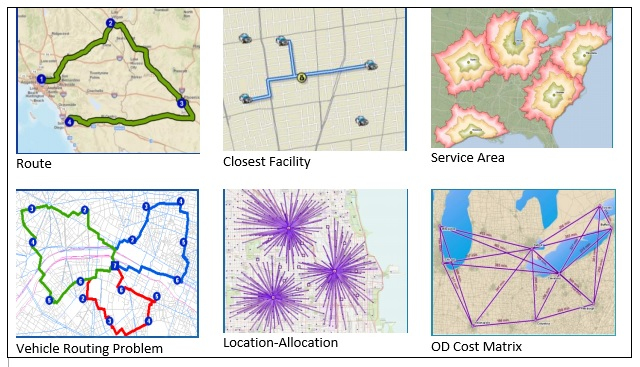
<text align="left">Fig 1. Common applications of Network Analysis (source: <a href="#References">[2]</a>)</text>

This guide is to walk you through the commonly used Network Analysis tools, and how the above mentioned concerns or questions can be solved by ArcGIS API for Python, in the following order:
 - Network Dataset and Network Analysis (You are here!) 
 - Find Routes (<a href="part2_find_routes.ipynb">Part 2</a>)
 - Generate Service Area (<a href="part3_generate_service_area.ipynb">Part 3</a>)
 - Find Closest Facility (<a href="part4_find_closest_facilities.ipynb">Part 4</a>)
 - Generate Origin Destination Cost Matrix (<a href="part5_generate_od_cost_matrix.ipynb">Part 5</a>)
 - Solve Location Allocation (<a href="part6_solve_location_allocation.ipynb">Part 6</a>)
 - Vehicle Routing Problem Service (<a href="part7_vehicle_routing_problem.ipynb">Part 7</a>)
 
Please refer to the road map above if you want to jump to the next topic. Otherwise, if you choose to stay with us, in part 1, you will get to know `network dataset`, and other preconditions needed to solve a network analysis problem. 

In the rest of the guide, <a href="part2_find_routes.ipynb">Part 2</a> introduces finding the quickest, shortest, or even the most scenic route, depending on the impedance you choose to solve for; <a href="part3_generate_service_area.ipynb">Part 3</a> guides you in finding service areas (a.k.a. a region that encompasses all accessible streets (that is, streets that are within a specified impedance) around any location on a network; <a href="part4_find_closest_facilities.ipynb">Part 4</a> walks you through steps in measuring the cost of traveling between incidents and facilities and determining which are nearest to one another; <a href="part5_generate_od_cost_matrix.ipynb">Part 5</a> talks about how to find and measure the least-cost paths along the network from multiple origins to multiple destinations; <a href="part6_solve_location_allocation.ipynb">Part 6</a> demonstrates processes in deciding the optimized allocation of new locations for facilities. More advanced topics such as Vehicle Routing problem, of which the goal is to best service the orders and minimize the overall operating cost for the fleet of vehicles will be covered in <a href="part7_vehicle_routing_problem.ipynb">Part 7</a>.


If you are new to Network Analysis or in need of a refresher of the concepts, the Youtube video below would serve as a good introduction to the key ideas:

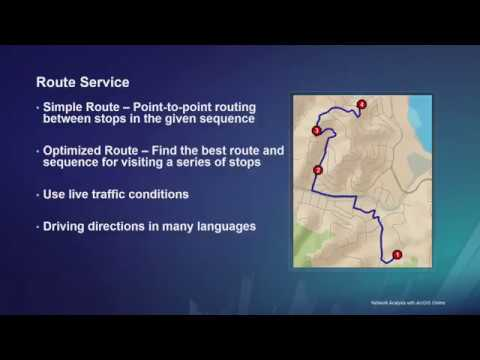

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('cakVXmuB0ag')

## What is a network?
A network is a system of interconnected elements, such as edges (lines) and connecting junctions (points), that represent possible routes from one location to another<a href="#References">[1]</a>..

People, resources, and goods tend to travel along networks: cars and trucks travel on roads, airliners fly on predetermined flight paths, and oil flows in pipelines. By modeling potential travel paths with a network, it is possible to perform analyses related to the movement of the oil, trucks, or other agents on the network. The most common network analysis is finding the shortest path between two points.

ArcGIS groups networks into two categories: utility networks and network datasets. This guide will only cover the second category, in order to learn more about utility network, please refer to <a href="https://pro.arcgis.com/en/pro-app/help/data/utility-network/what-is-a-utility-network-.htm">here</a>.

### Network Dataset

In order to model transportation networks, Network Datasets are created from source features, which can include simple features (lines and points) and turns, and store the connectivity of the source features. When you perform a network analysis, it is always done on a network dataset <a href="#References">[3]</a>.

Also, Network Datasets contain Network elements. Network elements are generated from the source features used to create the network datasets. The geometry of the source features helps establish connectivity. In addition, network elements have attributes that control navigation over the network <a href="#References">[4]</a>.

The following are the three types of network elements:

 - **Edges**—Edges connect to other elements (junctions) and are the links over which agents travel. Line feature classes participate as edge feature sources.
 - **Junctions**—Junctions connect edges and facilitate navigation from one edge to another. Point feature classes can participate as junction feature sources, but multipoint feature classes cannot.
 - **Turns**—Turns store information that can affect movement between two or more edges. Turn feature classes participate as turn feature sources in a network. A turn feature source models a subset of possible transitions between edge elements during navigation.
 
Edges and junctions form the basic structure of a network. Connectivity in a network deals with connecting edges and junctions to each other. Turns are optional elements that store information about a particular turning movement; for instance, a left turn is restricted from one particular edge to another.

### Multimodal Network Dataset

Multimodal Network Datasets are used for transportation situations when the set of [origin, destination] remain the same, but performed with two or more different modes of transport. For example, constructing a transportation network in downtown Paris in roads, railways, and buses would lead to multimodal network datasets <a href="#References">[3]</a>.

### 3D Network Dataset

Three-dimensional network datasets enable you to model the interior pathways of buildings, mines, caves, and so on. If you have street features with accurate z-coordinate values, you can use them with z-aware features that model pathways inside buildings to create 3D networks of campuses or even cities. This allows you to answer questions such as (1) What is the best wheelchair-accessible route between rooms in different buildings? (2) What floors of a high-rise building can't be reached by a fire department within eight minutes? <a href="#References">[1]</a>

## Network Analysis Services

<a href="https://enterprise.arcgis.com/en/server/latest/publish-services/windows/network-analysis-services.htm">Network Analysis (NA) services</a> are being called by the ArcGIS Network Analysis solvers (e.g. route, closest facility, service area, location-allocation, origin-destination cost matrix, and the vehicle routing problem). Users can choose between ready-to-use NA services hosted on ArcGIS Online, or customized NA services on enterprise that they have previously published and configured by themselves. If you perform an analysis using ArcGIS Online, the solver references a high-quality, worldwide network datasets stored in the ArcGIS Online cloud and will use ArcGIS Online credits. If you're using your own data, no online credits are used, but you need to associate your network datasets with the project <a href="#References">[1]</a>.

With ArcGIS Online network analysis services, you can also view historical, live, and predicted traffic conditions without creating or purchasing a network dataset or an ArcGIS Network Analyst extension license. The services reference high-quality street data that is updated periodically.

To access these services, you need an ArcGIS organizational account with the network analysis privilege, and the application must be connected to ArcGIS Online. If you are licensing ArcGIS Pro through an ArcGIS Online account, you are probably signed in to the application already. These services consume credits when they are run. Please refer to <a href="https://developers.arcgis.com/features/directions/"> developers website</a> or <a href="https://doc.arcgis.com/en/arcgis-online/administer/credits.htm#ESRI_SECTION1_709121D2C7694DCAB9B8592F36F7A5BA">ArcGIS help doc</a> for more information with credits.

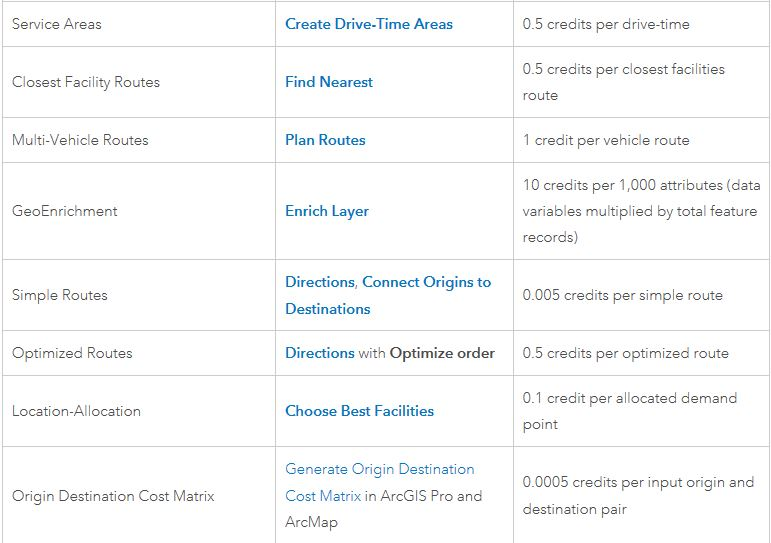
Fig 2. Credits consumed by network analysis services. Please refer to <a href="https://developers.arcgis.com/features/directions/"> developers website</a> or <a href="https://doc.arcgis.com/en/arcgis-online/administer/credits.htm#ESRI_SECTION1_709121D2C7694DCAB9B8592F36F7A5BA">ArcGIS help doc</a> for more information with credits.

Ready-to-use NA services on ArcGIS Online have provided convenience to users. However, there are situations where users prefer to use the customized NA services instead. For example, when the ArcGIS Online organization that users belong to has run of credits, or users need to keep the entire NA solving process in private and not allowed to share with others, or from a perspective of computational resources' concerns that the CPU or memory resources to be consumed by the solver would have exceeded the limitations of ArcGIS Online, then users need to consider the alternative approach, to use the customized NA services on Enterprise.

## What's next?

Multiple solver methods are available for fulfilling the requirements for routing, generating service areas, finding closest facilities, etc., and for the same operation, user can choose between two API methods - as defined in the `arcgis.network.analysis` and `arcgis.features.use_proximity` modules respectively. These implementations will be covered in the following <a href="part2_find_routes.ipynb">Part 2</a>, <a href="part3_generate_service_area.ipynb">Part 3</a>, and <a href="part4_find_closest_facilities.ipynb">Part 4</a>.

| Operation        |  network.analysis       | features.use_proximity |
|------------------|---------------------------------------------|------------------------|
| Route            |  find_routes            | plan_routes            |
| Service Area     |  generate_service_areas | create_drive_time_areas|
| Closest Facility | find_closest_facilities | find_nearest |

For instance, for the routing operation, you can choose from `network.analysis.find_routes` and `features.use_proximity.plan_routes`, as demonstrated in the table above. The differences between APIs in these two modules are:

 - `network.analysis` methods are comparatively faster, and can help solve bigger problems which require more time and resources from the server;
 - `network.analysis` tools can be considered as coarse-grained online widgets that aim to solve problems in a simpler way;
 - `network.analysis` contains all capabilities required for network analysis processes while `features.use_proximity` only contains a subset ;
 - `features.use_proximity` is workflow-driven, and Web GIS Oriented (a.k.a. with which user can input a Feature Service, and get the output as Feature Service), while the `network.analysis` tools take input parameters and return output variable as in-memory `FeatureCollection`.
 - In situations where the output `Feature Collection` is oversized, ArcGIS API for Python suggests users to implement a `features.use_proximity` workflow so that output can be handled on the server side and be saved as a Feature Service (since processing and creating `FeatureSet` as output can take much more memory and computation time).

## Conclusions

Part 1 has introduced network dataset, network analysis, and modules provided in ArcGIS API for Python needed to solve a network analysis problem. Next, let's move onto <a href="part2_find_routes.ipynb">Part 2</a> which demonstrates how to find the quickest, shortest, or even the most scenic route, depending on the impedance you choose to solve for.

## References

[1] "What is network analyst", https://pro.arcgis.com/en/pro-app/help/analysis/networks/what-is-network-analyst-.htm, accessed on September 2019

[2] Deelesh Mandloi, "Network Analysis Services in ArcGIS Enterprise", http://proceedings.esri.com/library/userconf/proc17/tech-workshops/tw_419-218.pdf, last accessed on 09/09/2019

[3] "What is a network dataset", https://pro.arcgis.com/en/pro-app/help/analysis/networks/what-is-network-dataset-.htm, accessed on September 2019

[4] "Network elements", https://pro.arcgis.com/en/pro-app/help/analysis/networks/network-elements.htm, accessed on September 2019

[5] "New Network Analysis Layer", https://pro.arcgis.com/en/pro-app/help/analysis/networks/new-network-analysis-layer.htm, accessed on 09/09/2019